In [17]:
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
df= pd.read_excel("BTECH ADS UG III R21 MAY 2024.xlsx")
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,Register No.,Name of the Student,Exam Month,Semester Name,Main Exam Code,Exam Subject Description,Main Exam Name,Credit,Grade Point,Grade,Status
1,23BAD001,Siva,May-2024,EVEN UG III R21,U18AIP6604,U18AIP6604-R21,MINIMUM USAGE PROTOTYPE,3,9,A+,PASS
2,23BAD002,Siva,May-2024,EVEN UG III R21,U18AII6203,U18AII6203T-R21,INDUSTRIAL IOT,4,10,O,PASS
3,23BAD003,Siva,May-2024,EVEN UG III R21,U18AII6202,U18AII6202T-R21,PROTOTYPE DEVELOPMENT,4,10,O,PASS
4,23BAD004,Siva,May-2024,EVEN UG III R21,U18AII6201,U18AII6201T-R21,APPLIED DESIGN THINKING,4,10,O,PASS


In [9]:
df = df.rename(
    columns = {
        "Unnamed: 0":"reg_no",
        "Unnamed: 1":"student_name",
        "Unnamed: 2":"exam_month",
        "Unnamed: 3":"semester_name",
        "Unnamed: 4":"main_exam_code",
        "Unnamed: 5":"exam_subject_description",
        "Unnamed: 6":"main_exam_name",
        "Unnamed: 7":"credit",
        "Unnamed: 8":"grade_point",
        "Unnamed: 9":"grade",
        "Unnamed: 10":"status"
    }
)

,reg_no,student_name,exam_month,semester_name,main_exam_code,exam_subject_description,main_exam_name,credit,grade_point,grade,status
0,Register No.,Name of the Student,Exam Month,Semester Name,Main Exam Code,Exam Subject Description,Main Exam Name,Credit,Grade Point,Grade,Status
1,23BAD001,Siva,May-2024,EVEN UG III R21,U18AIP6604,U18AIP6604-R21,MINIMUM USAGE PROTOTYPE,3,9,A+,PASS
2,23BAD002,Siva,May-2024,EVEN UG III R21,U18AII6203,U18AII6203T-R21,INDUSTRIAL IOT,4,10,O,PASS
3,23BAD003,Siva,May-2024,EVEN UG III R21,U18AII6202,U18AII6202T-R21,PROTOTYPE DEVELOPMENT,4,10,O,PASS
4,23BAD004,Siva,May-2024,EVEN UG III R21,U18AII6201,U18AII6201T-R21,APPLIED DESIGN THINKING,4,10,O,PASS


In [10]:
df = df.drop(df.index[0])
df.head()

,reg_no,student_name,exam_month,semester_name,main_exam_code,exam_subject_description,main_exam_name,credit,grade_point,grade,status
1,23BAD001,Siva,May-2024,EVEN UG III R21,U18AIP6604,U18AIP6604-R21,MINIMUM USAGE PROTOTYPE,3,9,A+,PASS
2,23BAD002,Siva,May-2024,EVEN UG III R21,U18AII6203,U18AII6203T-R21,INDUSTRIAL IOT,4,10,O,PASS
3,23BAD003,Siva,May-2024,EVEN UG III R21,U18AII6202,U18AII6202T-R21,PROTOTYPE DEVELOPMENT,4,10,O,PASS
4,23BAD004,Siva,May-2024,EVEN UG III R21,U18AII6201,U18AII6201T-R21,APPLIED DESIGN THINKING,4,10,O,PASS
5,23BAD005,Siva,May-2024,EVEN UG III R21,U18AIE0009,U18AIE0009-R21,STARTUP FUNDAMENTALS,3,9,A+,PASS


In [11]:
df.columns

Index(['reg_no', 'student_name', 'exam_month', 'semester_name',
       'main_exam_code', 'exam_subject_description', 'main_exam_name',
       'credit', 'grade_point', 'grade', 'status'],
      dtype='object')

In [12]:
df_clean = df.drop(['student_name', 'exam_month', 'semester_name'], axis=1)

In [13]:
df_clean['status'] = df_clean['status'].apply(lambda x: 1 if x == 'PASS' else 0)

In [14]:
summary_df = df_clean.groupby(['main_exam_code', 'exam_subject_description']).agg(
    total_students=('reg_no', 'count'),
    passed_students=('status', 'sum')
)

In [15]:
summary_df['percentage_pass'] = (summary_df['passed_students'] / summary_df['total_students']) * 100

In [16]:
summary_df

,,total_students,passed_students,percentage_pass
main_exam_code,exam_subject_description,,,
U18AIE0001,U18AIE0001-R21,62,62,100.0
U18AIE0003,U18AIE0003-R21,62,62,100.0
U18AIE0009,U18AIE0009-R21,62,62,100.0
U18AIE0021,U18AIE0021,6,6,100.0
U18AIE0217,U18AIE0217T,6,6,100.0
U18AII6201,U18AII6201T-R21,68,68,100.0
U18AII6202,U18AII6202T-R21,68,68,100.0
U18AII6203,U18AII6203T-R21,68,68,100.0
U18AIP6604,U18AIP6604-R21,68,68,100.0


In [18]:
def create_bar_chart(df):
    plt.figure(figsize=(10,6))
    plt.bar(df.index.get_level_values('main_exam_code'), df['percentage_pass'], color='skyblue')
    plt.xlabel('Main Exam Code')
    plt.ylabel('Percentage of Pass (%)')
    plt.title('Percentage of Pass by Main Exam Code')
    plt.xticks(rotation=45)
    plt.ylim(90, 101)
    plt.tight_layout()
    plt.show()

def create_pie_chart(df):
    passed_students = df['passed_students'].sum()
    total_students = df['total_students'].sum()
    failed_students = total_students - passed_students

    labels = 'Passed', 'Failed'
    sizes = [passed_students, failed_students]
    colors = ['#4CAF50', '#FF6347']  # Green for pass, red for fail

    plt.figure(figsize=(7, 7))
    plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.axis('equal') 
    plt.title('Pass vs Fail Distribution')
    plt.show()

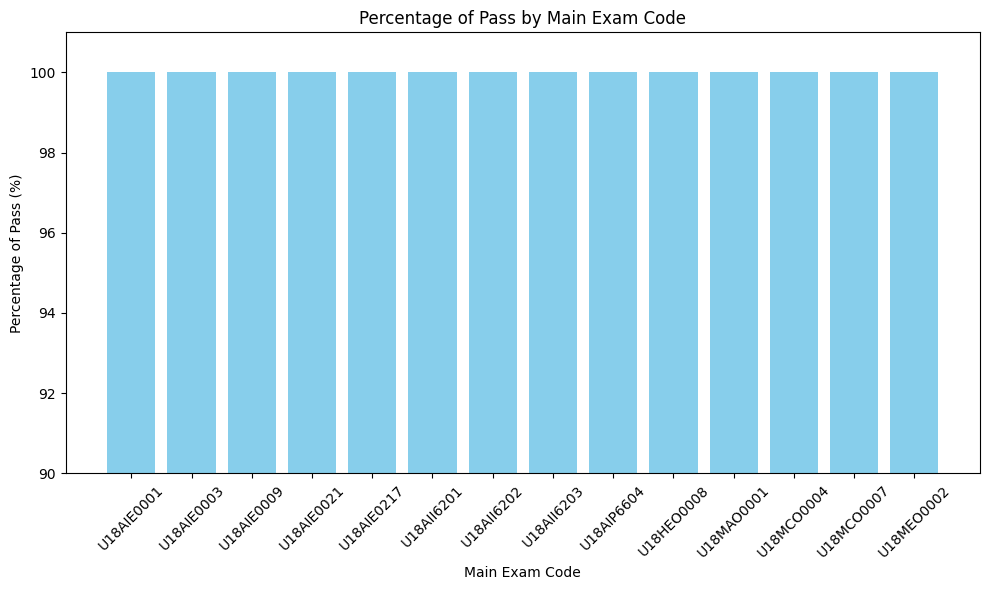

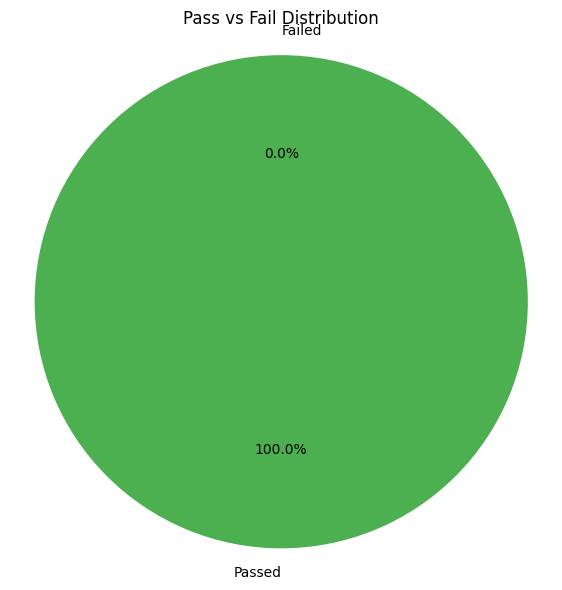

In [19]:
create_bar_chart(summary_df)
create_pie_chart(summary_df)

In [21]:
df_clean.head()

,reg_no,main_exam_code,exam_subject_description,main_exam_name,credit,grade_point,grade,status
1,23BAD001,U18AIP6604,U18AIP6604-R21,MINIMUM USAGE PROTOTYPE,3,9,A+,1
2,23BAD002,U18AII6203,U18AII6203T-R21,INDUSTRIAL IOT,4,10,O,1
3,23BAD003,U18AII6202,U18AII6202T-R21,PROTOTYPE DEVELOPMENT,4,10,O,1
4,23BAD004,U18AII6201,U18AII6201T-R21,APPLIED DESIGN THINKING,4,10,O,1
5,23BAD005,U18AIE0009,U18AIE0009-R21,STARTUP FUNDAMENTALS,3,9,A+,1


In [22]:
df_clean["main_exam_code"].nunique()

14